In [1]:
#!pip install tensorflow 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import glob
import os

%matplotlib inline

In [3]:
types = {
    'dst_port': 'uint32',
    'protocol': 'uint8',
    'timestamp': 'object',
    'flow_duration': 'int64',
    'tot_fwd_pkts': 'uint32',
    'tot_bwd_pkts': 'uint32',
    'totlen_fwd_pkts': 'uint32',
    'totlen_bwd_pkts': 'uint32',
    'fwd_pkt_len_max': 'uint16',
    'fwd_pkt_len_min': 'uint16',
    'fwd_pkt_len_mean': 'float32',
    'fwd_pkt_len_std': 'float32',
    'bwd_pkt_len_max': 'uint16',
    'bwd_pkt_len_min': 'uint16',
    'bwd_pkt_len_mean': 'float32',
    'bwd_pkt_len_std': 'float32',
    'flow_byts_s': 'float64',
    'flow_pkts_s': 'float64',
    'flow_iat_mean': 'float32',
    'flow_iat_std': 'float32',
    'flow_iat_max': 'int64',
    'flow_iat_min': 'int64',
    'fwd_iat_tot': 'int64',
    'fwd_iat_mean': 'float32',
    'fwd_iat_std': 'float32',
    'fwd_iat_max': 'int64',
    'fwd_iat_min': 'int64',
    'bwd_iat_tot': 'uint32',
    'bwd_iat_mean': 'float32',
    'bwd_iat_std': 'float32',
    'bwd_iat_max': 'uint32',
    'bwd_iat_min': 'uint32',
    'fwd_psh_flags': 'uint8',
    'bwd_psh_flags': 'uint8',
    'fwd_urg_flags': 'uint8',
    'bwd_urg_flags': 'uint8',
    'fwd_header_len': 'uint32',
    'bwd_header_len': 'uint32',
    'fwd_pkts_s': 'float32',
    'bwd_pkts_s': 'float32',
    'pkt_len_min': 'uint16',
    'pkt_len_max': 'uint16',
    'pkt_len_mean': 'float32',
    'pkt_len_std': 'float32',
    'pkt_len_var': 'float32',
    'fin_flag_cnt': 'uint8',
    'syn_flag_cnt': 'uint8',
    'rst_flag_cnt': 'uint8',
    'psh_flag_cnt': 'uint8',
    'ack_flag_cnt': 'uint8',
    'urg_flag_cnt': 'uint8',
    'cwe_flag_count': 'uint8',
    'ece_flag_cnt': 'uint8',
    'down_up_ratio': 'uint16',
    'pkt_size_avg': 'float32',
    'fwd_seg_size_avg': 'float32',
    'bwd_seg_size_avg': 'float32',
    'fwd_byts_b_avg': 'uint8',
    'fwd_pkts_b_avg': 'uint8',
    'fwd_blk_rate_avg': 'uint8',
    'bwd_byts_b_avg': 'uint8',
    'bwd_pkts_b_avg': 'uint8',
    'bwd_blk_rate_avg': 'uint8',
    'subflow_fwd_pkts': 'uint32',
    'subflow_fwd_byts': 'uint32',
    'subflow_bwd_pkts': 'uint32',
    'subflow_bwd_byts': 'uint32',
    'init_fwd_win_byts': 'int32',
    'init_bwd_win_byts': 'int32',
    'fwd_act_data_pkts': 'uint32',
    'fwd_seg_size_min': 'uint8',
    'active_mean': 'float32',
    'active_std': 'float32',
    'active_max': 'uint32',
    'active_min': 'uint32',
    'idle_mean': 'float32',
    'idle_std': 'float32',
    'idle_max': 'uint64',
    'idle_min': 'uint64',
    'label': 'category'
}


In [4]:
path1 = r"E:\Juypter-files\dataset1_LOCAL_DATA\csv_files - Copy"

csv = glob.glob(os.path.join(path1 , '*.csv'))
df = pd.concat((pd.read_csv(f,dtype = types) for f in csv))

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3145724 entries, 0 to 1048573
Data columns (total 80 columns):
 #   Column             Dtype  
---  ------             -----  
 0   dst_port           uint32 
 1   protocol           uint8  
 2   timestamp          object 
 3   flow_duration      int64  
 4   tot_fwd_pkts       uint32 
 5   tot_bwd_pkts       uint32 
 6   totlen_fwd_pkts    uint32 
 7   totlen_bwd_pkts    uint32 
 8   fwd_pkt_len_max    uint16 
 9   fwd_pkt_len_min    uint16 
 10  fwd_pkt_len_mean   float32
 11  fwd_pkt_len_std    float32
 12  bwd_pkt_len_max    uint16 
 13  bwd_pkt_len_min    uint16 
 14  bwd_pkt_len_mean   float32
 15  bwd_pkt_len_std    float32
 16  flow_byts_s        float64
 17  flow_pkts_s        float64
 18  flow_iat_mean      float32
 19  flow_iat_std       float32
 20  flow_iat_max       int64  
 21  flow_iat_min       int64  
 22  fwd_iat_tot        int64  
 23  fwd_iat_mean       float32
 24  fwd_iat_std        float32
 25  fwd_iat_max       

In [6]:
df.head()

,dst_port,protocol,timestamp,flow_duration,tot_fwd_pkts,tot_bwd_pkts,totlen_fwd_pkts,totlen_bwd_pkts,fwd_pkt_len_max,fwd_pkt_len_min,...,fwd_seg_size_min,active_mean,active_std,active_max,active_min,idle_mean,idle_std,idle_max,idle_min,label
0,443,6,02/03/2018 08:47:38,141385,9,7,553,3773,202,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
1,49684,6,02/03/2018 08:47:38,281,2,1,38,0,38,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
2,443,6,02/03/2018 08:47:40,279824,11,15,1086,10527,385,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
3,443,6,02/03/2018 08:47:40,132,2,0,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
4,443,6,02/03/2018 08:47:41,274016,9,13,1285,6141,517,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign


In [7]:
df.shape

(3145724, 80)

In [8]:
#df = df[df['label'] != "Bot"]

In [9]:
#df = df[df['label'] != "Brute Force -Web"]

In [10]:
#df = df[df['label'] != "Brute Force -XSS"]

In [11]:
#df = df[df['label'] != "SQL Injection"]

In [12]:
#df = df[df['label'] != "Infilteration"]

In [13]:
df.shape

(3145724, 80)

In [14]:
#df.transpose()

In [15]:
df.corr()

,dst_port,protocol,flow_duration,tot_fwd_pkts,tot_bwd_pkts,totlen_fwd_pkts,totlen_bwd_pkts,fwd_pkt_len_max,fwd_pkt_len_min,fwd_pkt_len_mean,...,fwd_act_data_pkts,fwd_seg_size_min,active_mean,active_std,active_max,active_min,idle_mean,idle_std,idle_max,idle_min
dst_port,1.000000,-0.255490,0.000723,-0.011595,-0.011765,0.036429,-0.009798,0.464337,-0.193409,0.421835,...,-0.051396,0.284677,-0.024913,-0.024666,-0.033072,-0.018618,0.003024,-0.001067,0.000854,0.014179
protocol,-0.255490,1.000000,-0.003618,-0.025591,-0.010410,-0.043854,-0.006740,-0.256725,0.734098,-0.095430,...,-0.056201,-0.647298,-0.044627,-0.042872,-0.052250,-0.032324,-0.007733,-0.002920,-0.005054,-0.018787
flow_duration,0.000723,-0.003618,1.000000,0.001428,0.001866,0.001879,0.001464,0.001871,-0.002341,-0.000933,...,0.005889,-0.000873,0.004142,0.004495,0.005762,0.002924,-0.643645,-0.635679,-0.658024,-0.175654
tot_fwd_pkts,-0.011595,-0.025591,0.001428,1.000000,0.698186,0.086470,0.694597,0.042754,-0.018370,0.017988,...,0.179477,-0.004652,0.064057,0.045018,0.074766,0.054515,0.001947,0.001444,0.001727,0.002435
tot_bwd_pkts,-0.011765,-0.010410,0.001866,0.698186,1.000000,0.047675,0.999127,0.021649,-0.008688,0.001752,...,0.116266,-0.005357,0.056199,0.028309,0.060579,0.053551,0.000568,0.000083,0.000260,0.001952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
active_min,-0.018618,-0.032324,0.002924,0.054515,0.053551,0.014766,0.051863,0.001869,0.022054,0.004816,...,0.021225,-0.041473,0.912248,0.139965,0.735585,1.000000,0.001183,0.000334,0.000620,0.003753
idle_mean,0.003024,-0.007733,-0.643645,0.001947,0.000568,-0.000192,0.000542,-0.004383,-0.002805,-0.005812,...,0.000695,-0.007381,0.001457,0.001112,0.001547,0.001183,1.000000,0.976886,0.983847,0.486593
idle_std,-0.001067,-0.002920,-0.635679,0.001444,0.000083,-0.000105,0.000094,-0.001078,-0.000115,-0.001174,...,-0.000063,-0.003923,0.000479,0.000460,0.000518,0.000334,0.976886,1.000000,0.990848,0.342926
idle_max,0.000854,-0.005054,-0.658024,0.001727,0.000260,-0.000168,0.000258,-0.002588,-0.001394,-0.003290,...,0.000218,-0.005403,0.000771,0.000596,0.000813,0.000620,0.983847,0.990848,1.000000,0.379618


<AxesSubplot:>

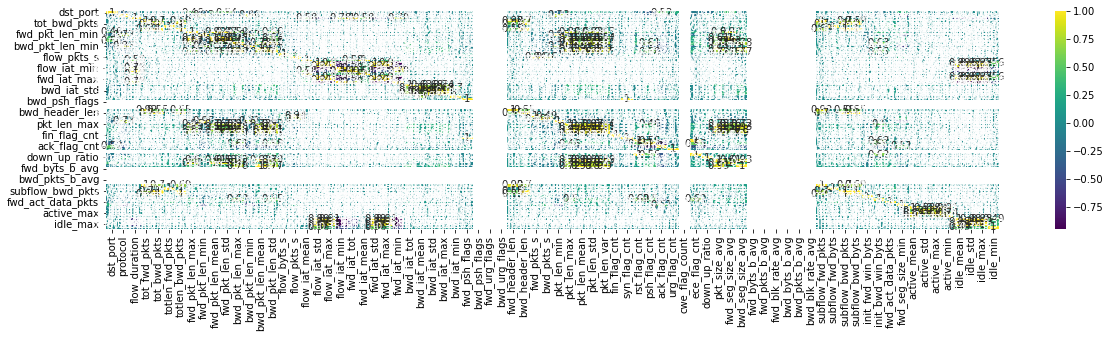

In [16]:
plt.figure(figsize=(20,4))
sns.heatmap(df.corr(),annot=True,cmap='viridis')

In [17]:
df.isnull().sum().sum()

6127

In [18]:
df['label'].unique()

array(['Benign', 'Bot', 'Brute Force -Web', 'Brute Force -XSS',
       'SQL Injection', 'DoS attacks-SlowHTTPTest', 'DoS attacks-Hulk'],
      dtype=object)

In [19]:
benign_indexes = df[df['label'] == "Benign"].index

In [20]:
len(benign_indexes)

2257369

In [21]:
df['label'].value_counts()

Benign                      2257369
DoS attacks-Hulk             461912
Bot                          286191
DoS attacks-SlowHTTPTest     139890
Brute Force -Web                249
Brute Force -XSS                 79
SQL Injection                    34
Name: label, dtype: int64

In [22]:
df['label'] = df['label'].map({'Benign':1, 'Brute Force -Web':0, 'DoS attacks-SlowHTTPTest':0,'DoS attacks-Hulk':0,'Brute Force -Web':0, 'Brute Force -XSS':0,'SQL Injection':0})

In [23]:
df['label'].value_counts()

1.0    2257369
0.0     602164
Name: label, dtype: int64

In [24]:
df1 = df.drop('label', axis=1)

In [25]:
df.head()

,dst_port,protocol,timestamp,flow_duration,tot_fwd_pkts,tot_bwd_pkts,totlen_fwd_pkts,totlen_bwd_pkts,fwd_pkt_len_max,fwd_pkt_len_min,...,fwd_seg_size_min,active_mean,active_std,active_max,active_min,idle_mean,idle_std,idle_max,idle_min,label
0,443,6,02/03/2018 08:47:38,141385,9,7,553,3773,202,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,1.0
1,49684,6,02/03/2018 08:47:38,281,2,1,38,0,38,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,1.0
2,443,6,02/03/2018 08:47:40,279824,11,15,1086,10527,385,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,1.0
3,443,6,02/03/2018 08:47:40,132,2,0,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,1.0
4,443,6,02/03/2018 08:47:41,274016,9,13,1285,6141,517,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,1.0


In [26]:
df.select_dtypes(['object']).columns

Index(['timestamp'], dtype='object')

In [27]:
df['flow_byts_s'].value_counts()

0.000000e+00    1215195
inf                3533
3.100000e+07       2578
7.700000e+07       1005
1.550000e+07        541
                 ...   
7.643975e+02          1
8.059144e+02          1
7.680216e+02          1
8.139455e+02          1
2.508075e+02          1
Name: flow_byts_s, Length: 1466140, dtype: int64

In [28]:
df['flow_pkts_s'].value_counts()

1.000000e+06    63170
6.666667e+05    47198
2.000000e+06    14123
inf              9660
4.000000e+05     5527
                ...  
1.268887e+00        1
3.709312e-02        1
1.486447e+00        1
7.083647e-01        1
1.707464e+00        1
Name: flow_pkts_s, Length: 1472665, dtype: int64

In [29]:
#df = df.drop('flow_id', axis=1)

In [30]:
#df = df.drop(' Source IP', axis=1)

In [31]:
#df = df.drop(' Destination IP', axis=1)

In [32]:
df = df.drop('timestamp', axis=1)

In [33]:
df = df.drop('flow_byts_s' , axis=1)

In [34]:
df = df.drop('flow_pkts_s' , axis=1)

In [35]:
df.head()

,dst_port,protocol,flow_duration,tot_fwd_pkts,tot_bwd_pkts,totlen_fwd_pkts,totlen_bwd_pkts,fwd_pkt_len_max,fwd_pkt_len_min,fwd_pkt_len_mean,...,fwd_seg_size_min,active_mean,active_std,active_max,active_min,idle_mean,idle_std,idle_max,idle_min,label
0,443,6,141385,9,7,553,3773,202,0,61.444443,...,20,0.0,0.0,0,0,0.0,0.0,0,0,1.0
1,49684,6,281,2,1,38,0,38,0,19.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,1.0
2,443,6,279824,11,15,1086,10527,385,0,98.727272,...,20,0.0,0.0,0,0,0.0,0.0,0,0,1.0
3,443,6,132,2,0,0,0,0,0,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,1.0
4,443,6,274016,9,13,1285,6141,517,0,142.777771,...,20,0.0,0.0,0,0,0.0,0.0,0,0,1.0


<AxesSubplot:xlabel='label', ylabel='count'>

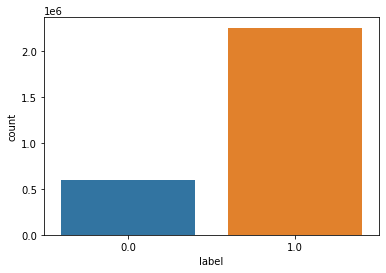

In [36]:
sns.countplot(x='label', data=df)

In [37]:
df = df.dropna()

In [38]:
df.isnull().sum().sum()

0

In [39]:
len(df)

2859533

In [40]:
# Instead of dropping rows which contain any nulls and infinite numbers, 
#return the rows where all cells are finite numbers. 
#The numpy isfinite function does this and the '.all(1)' will only return a 
#TRUE if all cells in row are finite.
df = df[np.isfinite(df).all(1)]

In [41]:
len(df)

2859533

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X = df.drop('label',axis=1).values
y = df['label'].values

In [44]:
# # Taking 0.1 fraction of df
# df = df.sample(frac=0.1,random_state=101)
# print(len(df))

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [46]:
from sklearn.preprocessing import MinMaxScaler

In [47]:
scaler = MinMaxScaler()

In [48]:
X_train = scaler.fit_transform(X_train)

In [49]:
X_test = scaler.transform(X_test)

In [50]:
X_train.shape

(2287626, 76)

In [51]:
X_test.shape

(571907, 76)

In [52]:
y_train.shape

(2287626,)

In [53]:
y_test.shape

(571907,)

In [54]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm

In [55]:
model = Sequential()

# input layer
model.add(Dense(80,  activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(40, activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(20, activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam')

In [58]:
print(model.compute_output_signature)

<bound method Layer.compute_output_signature of <keras.engine.sequential.Sequential object at 0x000001E704407700>>


In [59]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=25,
          batch_size=256,
          validation_data=(X_test, y_test), 
          )

Epoch 1/25
8937/8937 [==============================] - 14s 2ms/step - loss: 7.6574e-04 - val_loss: 6.3758e-04
Epoch 2/25
8937/8937 [==============================] - 14s 2ms/step - loss: 7.4504e-04 - val_loss: 7.5852e-04
Epoch 3/25
8937/8937 [==============================] - 14s 2ms/step - loss: 7.5394e-04 - val_loss: 6.6838e-04
Epoch 4/25
8937/8937 [==============================] - 15s 2ms/step - loss: 6.7123e-04 - val_loss: 7.5120e-04
Epoch 5/25
8937/8937 [==============================] - 14s 2ms/step - loss: 7.1266e-04 - val_loss: 6.3577e-04
Epoch 6/25
8937/8937 [==============================] - 15s 2ms/step - loss: 7.0036e-04 - val_loss: 6.4535e-04
Epoch 7/25
8937/8937 [==============================] - 14s 2ms/step - loss: 7.3127e-04 - val_loss: 6.6788e-04
Epoch 8/25
8937/8937 [==============================] - 15s 2ms/step - loss: 7.0637e-04 - val_loss: 6.1787e-04
Epoch 9/25
8937/8937 [==============================] - 15s 2ms/step - loss: 5.8989e-04 - val_loss: 5.6430e-04
E

In [60]:
from tensorflow.keras.models import load_model

In [ ]:
model.save('dos_attack_final.h5')

In [61]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

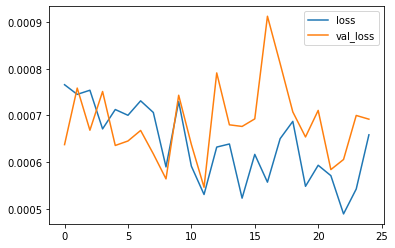

In [62]:
losses[['loss','val_loss']].plot()

In [63]:
from sklearn.metrics import classification_report ,confusion_matrix

In [64]:
from sklearn.metrics import precision_recall_fscore_support

In [65]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

In [66]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    120558
         1.0       1.00      1.00      1.00    451349

    accuracy                           1.00    571907
   macro avg       1.00      1.00      1.00    571907
weighted avg       1.00      1.00      1.00    571907



In [67]:
confusion_matrix(y_test,predictions)

array([[120511,     47],
       [     3, 451346]], dtype=int64)